In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sensor Model
p_l_given_b = 0.3
p_l_given_l = 0.9

# Action Model
p_b_given_l_and_sr = 0.7
p_b_given_b_and_sr = 0.3

p_l_given_b_and_sr = 0.8
p_l_given_l_and_sr = 0.2

In [3]:
def bayesian_filtering(bel_x0_is_l = 0.5, bel_x0_is_b = 0.5):
    if bel_x0_is_l + bel_x0_is_b != 1:
        print('Invalid Prior')
        return None
    else:
        # Probabilities for bel(x1)
        bel_prime_x1_is_l = p_l_given_l_and_sr * bel_x0_is_l + p_l_given_b_and_sr * bel_x0_is_b
        bel_prime_x1_is_b = p_b_given_l_and_sr * bel_x0_is_l + p_b_given_b_and_sr * bel_x0_is_b
        eta_x1_is_l = p_l_given_l * bel_prime_x1_is_l
        eta_x1_is_b = p_l_given_b * bel_prime_x1_is_b
        eta_1 = 1/(eta_x1_is_l + eta_x1_is_b)
        bel_x1_is_l = eta_1 *  p_l_given_l * bel_prime_x1_is_l
        bel_x1_is_b = eta_1 *  p_l_given_b * bel_prime_x1_is_b
        
        # Probabilities for bel(x2)
        bel_prime_x2_is_l = p_l_given_l_and_sr * bel_x1_is_l + p_l_given_b_and_sr * bel_x1_is_b
        bel_prime_x2_is_b = p_b_given_l_and_sr * bel_x1_is_l + p_b_given_b_and_sr * bel_x1_is_b
        eta_x2_is_l = p_l_given_l * bel_prime_x2_is_l
        eta_x2_is_b = p_l_given_b * bel_prime_x2_is_b
        eta_2 = 1/(eta_x2_is_l + eta_x2_is_b)
        bel_x2_is_l = eta_2 *  p_l_given_l * bel_prime_x2_is_l
        bel_x2_is_b = eta_2 *  p_l_given_b * bel_prime_x2_is_b  
        
        return (bel_x2_is_l, bel_x2_is_b)

# Bayesian filtering for Default Prior       
bel_x2_is_l,bel_x2_is_b = bayesian_filtering()  
print('bel(x2=L)={},bel(x2=B)={} is obtained with uniform prior distribution'
      .format(np.round(bel_x2_is_l,2),np.round(bel_x2_is_b,2)))

bel(x2=L)=0.64,bel(x2=B)=0.36 is obtained with uniform prior distribution


In [14]:
# To find Mininum total posterior probability distribution based on various prior distribution i.e. bel(x0)
def find_minimum(step):
    prob_list = []
    # Search all possible combination
    for i in np.linspace(0,1,step):
        bel_x0_is_l = i
        bel_x0_is_b = 1 - i
        bel_x2_is_l, bel_x2_is_b = bayesian_filtering(bel_x0_is_l,bel_x0_is_b)
        prob_list.append([bel_x0_is_l,bel_x0_is_b,bel_x2_is_l,bel_x2_is_b])
    # Calculate the minimum
    prob_array = np.array(prob_list).reshape(step,4)
    min_prob = min(prob_array[:,2])
    i, j = np.where(np.isclose(prob_array, min_prob))
    return prob_array[i].reshape(4,)

prob = find_minimum(100)
print('Minimum posterior probability i.e. bel(x2=L)={},bel(x2=B)={} is obtain with bel(x0=L)={} and bel(x0=B)={}'
      .format(np.round(prob[2],2),np.round(prob[3],2),prob[0],prob[1]))

Minimum posterior probability i.e. bel(x2=L)=0.55,bel(x2=B)=0.45 is obtain with bel(x0=L)=0.0 and bel(x0=B)=1.0


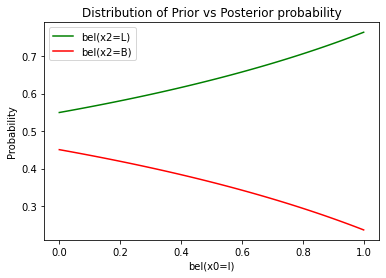

In [16]:
def plot_distribution(step):
    prob_list = []
    X =  np.linspace(0,1,step)
    for i in X:
        bel_x0_is_l = i
        bel_x0_is_b = 1 - i
        bel_x2_is_l, bel_x2_is_b = bayesian_filtering(bel_x0_is_l,bel_x0_is_b)
        prob_list.append([bel_x0_is_l,bel_x0_is_b,bel_x2_is_l,bel_x2_is_b])
    prob_array = np.array(prob_list).reshape(step,4)
    
    plt.plot(X, prob_array[:,2], color='g', label='bel(x2=L)')
    plt.plot(X, prob_array[:,3], color='r', label='bel(x2=B)')
    plt.xlabel("bel(x0=l)")
    plt.ylabel("Probability")
    plt.title("Distribution of Prior vs Posterior probability")
    plt.legend()
    plt.show()
    
# Plotting Results
plot_distribution(100)